# Decision Tree Classification

Ruixuan Dong

---

## Table of Contents
- [Decision Tree Classification algorithm](#1)
  - [Algorithm Explanation](#11)
  - [Information Gain and Gini Index](#12)
- [Research Problem – Using a dataset to perform classification](#2)
  - [Overview of the Problem set](#21)
  - [Data Preprocessing](#22)
  - [Building the Decision Tree](#23)
  - [Evaluating the Model](#24)
  - [Visualizing the Decision Tree](#25)
- [A Typical Example – SCG Simulated DataSet](#3)
  - [Overview of the Problem set](#31)
  - [Implement of Decision Tree Classification](#32)


<a name='1'></a>
## 1 - The Decision Tree Classification algorithm

First, let's run the cell below to import all the packages that we will need during this tutorial.


In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image

<a name='11'></a>
### 1-1 Algorithm Explanation

A Decision Tree algorithm works by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node has the same value of the target variable, or when splitting no longer adds value to the predictions.

The decision criteria are often based on measures such as Gini impurity or information gain for classification trees. For regression trees, variance reduction is often used.

<a name='12'></a>
### 1-2 Information Gain and Gini Index

Information gain is used to decide which feature to split on at each step in building the tree. Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.

An ideal decision tree will have an attribute with the highest information gain at the root. We recursively create branches for the tree based on the attribute values.

#### Gini Impurity
The Gini impurity measure is a way to determine how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. It can be computed by summing the probability $p_i$ of an item with label $i$ being chosen times the probability $1 - p_i$ of a mistake in categorizing that item.

The Gini Impurity can be written as:

$$
Gini = 1 - \sum_{i=1}^{n} p_i^2 
$$

where $n$ is the number of classes and $p_i$ is the probability of picking a datapoint with class $i$ in the set.

#### Information Gain
Information gain is another measure used to split a node. It measures the change in entropy or surprise from the prior state to the new one, i.e., the information that can make the data more orderly.

The information gain (IG) for a split on an attribute is given by:

$$
IG(D_p, f) = I(D_p) - \sum_{j=1}^{m} \frac{N_j}{N_p} I(D_j)
$$

where:
- $IG(D_p, f)$ is the information gain by applying feature $f$,
- $I(D_p)$ is the entropy of the parent set,
- $I(D_j)$ is the entropy of the $j$-th subset created by the split,
- $N_p$ is the total number of samples in the parent set,
- $N_j$ is the number of samples in the $j$-th subset.

Entropy itself is given by the formula:

$$
I(D) = - \sum_{i=1}^{n} p_i \log_2 p_i
$$

The decision tree algorithm will try to maximize this information gain when deciding where to split.


<a name='2'></a>
## 2 - Research Problem – Using the Iris dataset to perform classification

We will use the Iris dataset, which contains data about three species of Iris flowers. Our goal is to build a decision tree classifier that can accurately classify the species based on the measurements of the flowers.


<a name='21'></a>
### 2-1 Overview of the Problem set

The Iris dataset consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.


In [20]:
# Load the iris dataset
iris = datasets.load_iris()

# Display the first 5 rows of the dataset
pd.DataFrame(iris.data, columns=iris.feature_names).head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<a name='22'></a>
### 2-2 Data Preprocessing

Before building the model, we often need to pre-process the data. In this case, the Iris dataset is already clean; hence, we will proceed to build the decision tree.


In [21]:
X = iris.data
y = iris.target

# Split the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<a name='23'></a>
### 2-3 Building the Decision Tree

We will now build the decision tree using the scikit-learn library.


In [22]:
# Create a Decision Tree Classifier object
dtree = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier to the data
dtree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy')

<a name='24'></a>
### 2-4 Evaluating the Model

After training the model, we evaluate its performance on the test set.


In [23]:
# Predict the responses for the test set
y_pred = dtree.predict(X_test)

# Compute the classification report and confusion matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


<a name='25'></a>
### 2-5 Visualizing the Decision Tree

Visualizing the decision tree will help us understand how the model makes decisions.


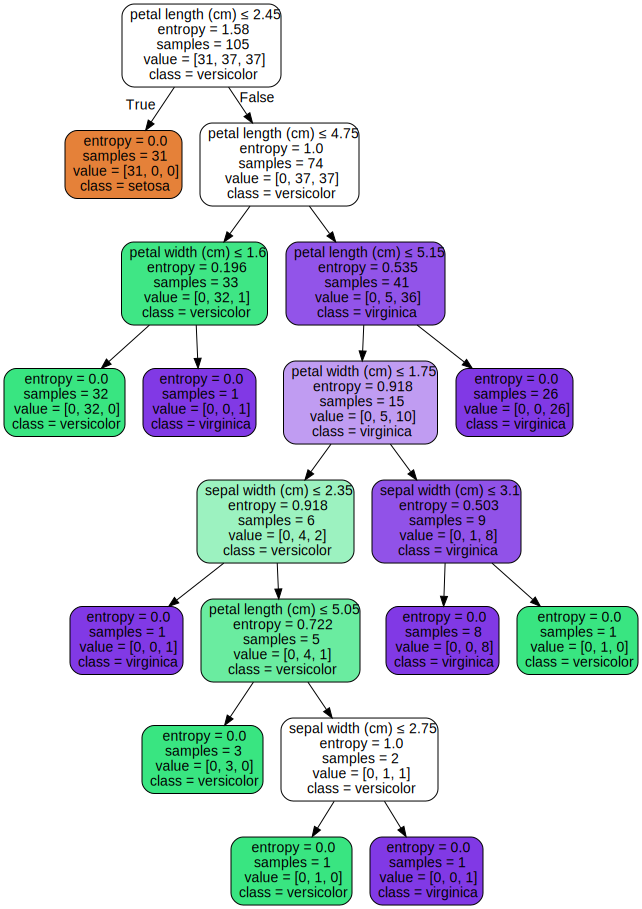

In [24]:
# This requires the graphviz library to be installed.
import graphviz 

# Export the decision tree to a dot file
dot_data = export_graphviz(dtree, out_file=None, 
                           feature_names=iris.feature_names,  
                           class_names=iris.target_names,
                           filled=True, rounded=True,  
                           special_characters=True)

# Use graphviz to render the image
graph = graphviz.Source(dot_data) 
graph


<a name='3'></a>
## 3 - A Typical Example – SCG Simulated DataSet

In this part, we use the dataset generated by Synthetic SCG data generator https://github.com/wsonguga/DataDemo. In the data file, each row includes sensor data (10 seconds * 100Hz) + HeartRate + RespiratoryRate + SystolicBloodPressure + DiastolicBloodPressure.

Now we would like to give a introduction about the synthetic SCG dataset we generated. 

Based on Synthetic SCG data generator, we generated an artificial (synthetic) scg signal of a given duration (10 seconds, i.e. duration=10) and sampling rate (100Hz, i.e. sampling rate=100) using a model based on Daubechies wavelets to roughly approximate cardiac cycles.

Besides, we set 
 - heart rate to be randomly chosen from the intgers range from 50 to 150, with the desired heart rate standard deviation (beats per minute) equal to 1.
 - respiratory rate to be randomly chosen from the intgers range from 10 to 30
 - diastolic blood pressure to be randomly chosen from the intgers range from 60 to 99
 - systolic blood pressure to be randomly chosen from the intgers range from 100 to 160

The sample size of the current dataset is 6,000 in total.


<a name='31'></a>
### 3-1 Overview of the Problem set 

**Problem Statement:** The generated dataset containing: 
- a dataset set ("lower.csv") of 3,000 samples labeled as lower (100<=systolic blood pressure<140) 
- a dataset set ("higher.csv") of 3,000 samples labeled as higher (140<=systolic blood pressure<=160) 
- each sample is of shape (1, 1003) where 1003 is for the 1000-d signal and heart rate, respiratory rate and diastolic blood pressure

In this part, we will build a simple kNN classifier that can correctly classify samples as lower or higher (SBP).

Let's get more familiar with the dataset. Load the data by running the following code.

In [25]:
column_names = [str(i) for i in range(1, 1001)] + ['heart_rate', 'respiratory_rate', 'systolic', 'diastolic']
total = pd.read_csv('total_large.csv', 
                     header=None, 
                     names=column_names)
total.head(3)

,1,2,3,4,5,6,7,8,9,10,...,995,996,997,998,999,1000,heart_rate,respiratory_rate,systolic,diastolic
0,5.439234e-08,2.583753e-07,0.000001,0.000004,0.000008,0.000006,-4.897503e-07,-0.000004,-2.029141e-07,3.029687e-06,...,-3.750468e-08,-3.504179e-08,-3.266654e-08,-2.969555e-08,-2.688206e-08,-2.599564e-08,109.0,19.0,160.0,66.0
1,5.781177e-08,3.850786e-07,0.000002,0.000007,0.000007,-0.000001,-3.642447e-06,0.000002,8.308896e-07,-1.850758e-06,...,-3.937486e-08,-3.615418e-08,-3.250324e-08,-2.930146e-08,-2.813366e-08,-2.915194e-08,131.0,15.0,153.0,64.0
2,3.434446e-08,2.098668e-07,0.000003,0.000006,-0.000003,0.000002,-1.939304e-06,0.000001,-9.990558e-07,3.452373e-07,...,-3.199401e-08,-2.472291e-08,-1.890941e-08,-1.882332e-08,-2.188260e-08,-2.335538e-08,128.0,14.0,120.0,85.0


Now let's combine the two dataset in row and get the total dataset with 6,000 sample size. Before processing the data set, we fisrt check the distribution of systolic blood pressure among the whole dataset. Given the figure below, it is clear that the systolic blood pressure generated here is more like a "step". Therefore, it's reasonable for us to set 100<= systolic blood pressure <140, 140<= systolic blood pressure <=160 as two classes.


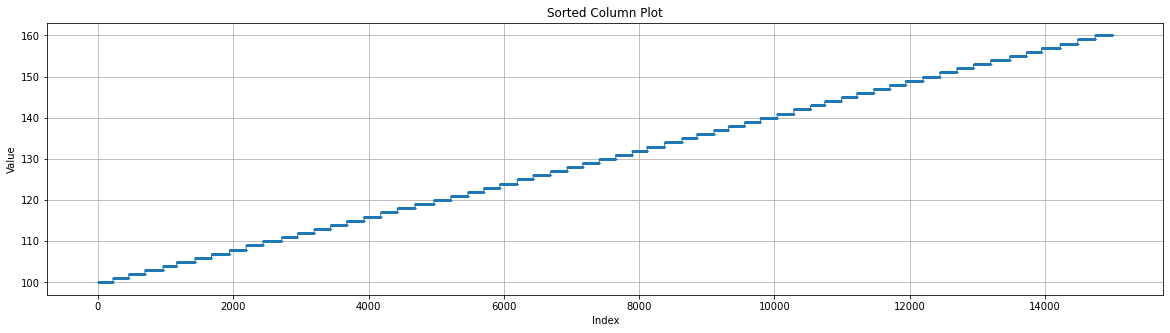

In [26]:
total.reset_index(drop=True, inplace=True)

column_to_plot = total.iloc[:, 1002] 
sorted_column = np.sort(column_to_plot)

# Create a plot
plt.figure(figsize=(20, 5))
plt.plot(sorted_column, marker='o', linestyle='-', linewidth=1.0, markersize=0.5)
plt.title('Sorted Column Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

<a name='31'></a>
### 3-2 Implement of Decision Tree Classification

In [27]:
def signal2matrix(total):
    total = total.values

    numberOfLines = len(total)
    returnMat = np.zeros((numberOfLines, 1003))
    classLabelVector = []
    index = 0

    for line in total:
        returnMat[index, :1002] = line[:1002]
        returnMat[index, 1002] = line[1003]
        if 100 <=line[1002]< 140:
            classLabelVector.append(1)
        elif 140 <=line[1002]<= 160:
            classLabelVector.append(2)
        index += 1
    return returnMat, classLabelVector

def autoNorm(dataSet):
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

In [28]:
feature_matrix, class_labels = signal2matrix(total)
norm_feature_matrix, ranges, minVals = autoNorm(feature_matrix)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    norm_feature_matrix, class_labels, test_size=0.3, random_state=42)


from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)


predictions = dtree.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(f"Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")


[[2896   27]
 [  39 1538]]
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      2923
           2       0.98      0.98      0.98      1577

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

Accuracy: 98.53%


K-Nearest Neighbors (KNN) Classifier: Accuracy: 58.53%

The accuracy of KNN is significantly lower than that of the Decision Tree. This could suggest that the decision boundaries between different classes are not linear or not well-defined in the feature space. KNN is a distance-based algorithm that may struggle if the classes are not well separated or if the dimensionality of the data is high (which can cause the "curse of dimensionality").